In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== Path to YOLOv8 (NO NECK) =====
Result_BaseModel_C1_path = r"C:/Users/User/PycharmProjects/PythonProject/FYP/FoodWasteEstimator/food-101/food101_yolo/Result_CLS_No_Neck"

# ===== Path to Result model YOLOv8 (NO NECK) =====
P_BaseModel_C1 = Result_BaseModel_C1_path + r"/runs_model/results.csv"
P_SB_C1 = Result_BaseModel_C1_path + r"/runs_star/results_star.csv"
P_C2fSB_C1 = Result_BaseModel_C1_path + r"/runs_c2fstar/results_B_CF2Star.csv"
P_SPPF_C1 = Result_BaseModel_C1_path + r"/runs_SPPF/results_SPPF.csv"
P_Spatial_C1 = Result_BaseModel_C1_path + r"/runs_SA/results_SA.csv"
P_Channel_C1 = Result_BaseModel_C1_path + r"/runs_CA/results_CA.csv"

# ===== Path to YOLOv8 (NECK) =====
Result_BaseModel_C2_path = r"C:/Users/User/PycharmProjects/PythonProject/FYP/FoodWasteEstimator/food-101/food101_yolo/Result_CLS_Neck"

# ===== Path to Result model YOLOv8 (NECK) =====
P_BaseModel_C2 = Result_BaseModel_C2_path + r"/runs_neck/results_neck.csv"
P_SB_C2 = Result_BaseModel_C2_path + r"/runs_N_star/results_N_star.csv"
P_S_C2fS_C2 = Result_BaseModel_C2_path + r"/runs_N_star_Cf2star/results_N_star_cf2star.csv"
P_S_Spatial_C2 = Result_BaseModel_C2_path + r"/runs_N_star_SA/results_N_star_SA.csv"
P_S_Channel_C2 = Result_BaseModel_C2_path + r"/runs_N_star_CA/results_N_star_CA.csv"


In [5]:
# ===== Load YOLOv8 (NO NECK) results =====
df_B_C1 = pd.read_csv(P_BaseModel_C1)
df_SB_C1 = pd.read_csv(P_SB_C1)
df_C2fSB_C1 = pd.read_csv(P_C2fSB_C1)
df_SPPF_C1 = pd.read_csv(P_SPPF_C1)
df_SA_C1 = pd.read_csv(P_Spatial_C1)
df_CA_C1 = pd.read_csv(P_Channel_C1)

# ===== Load YOLOv8 (NECK) results =====
df_B_C2 = pd.read_csv(P_BaseModel_C2)
df_SB_C2 = pd.read_csv(P_SB_C2)
df_S_C2fSB_C2 = pd.read_csv(P_S_C2fS_C2)
df_S_SA_C2 = pd.read_csv(P_S_Spatial_C2)
df_S_CA_C2 = pd.read_csv(P_S_Channel_C2 )


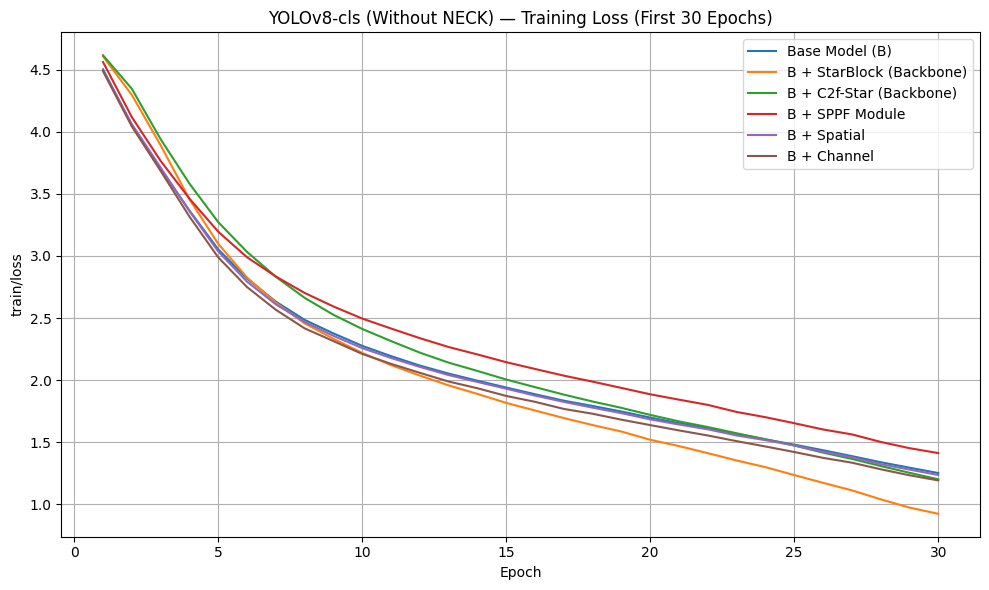

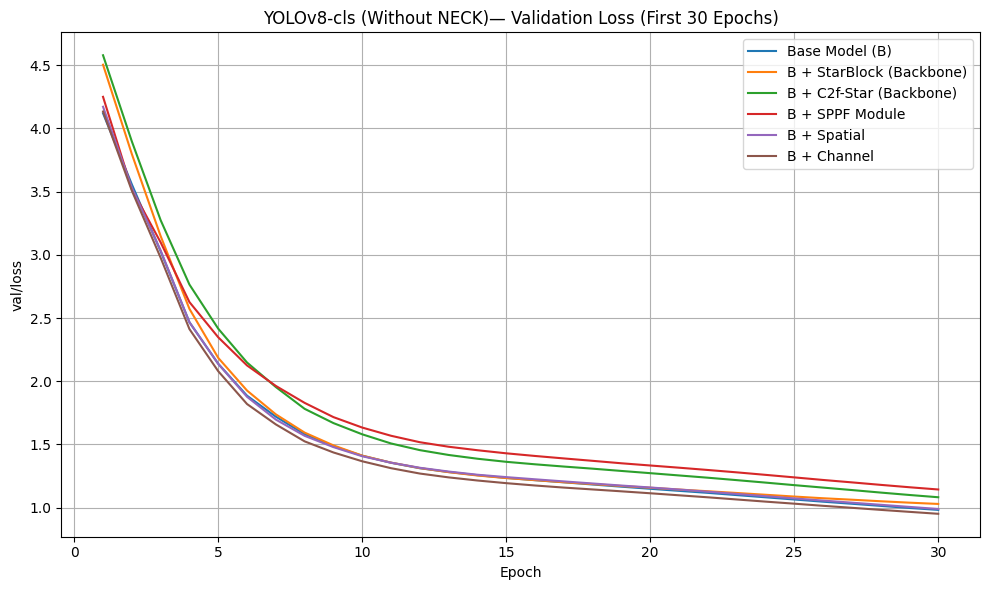

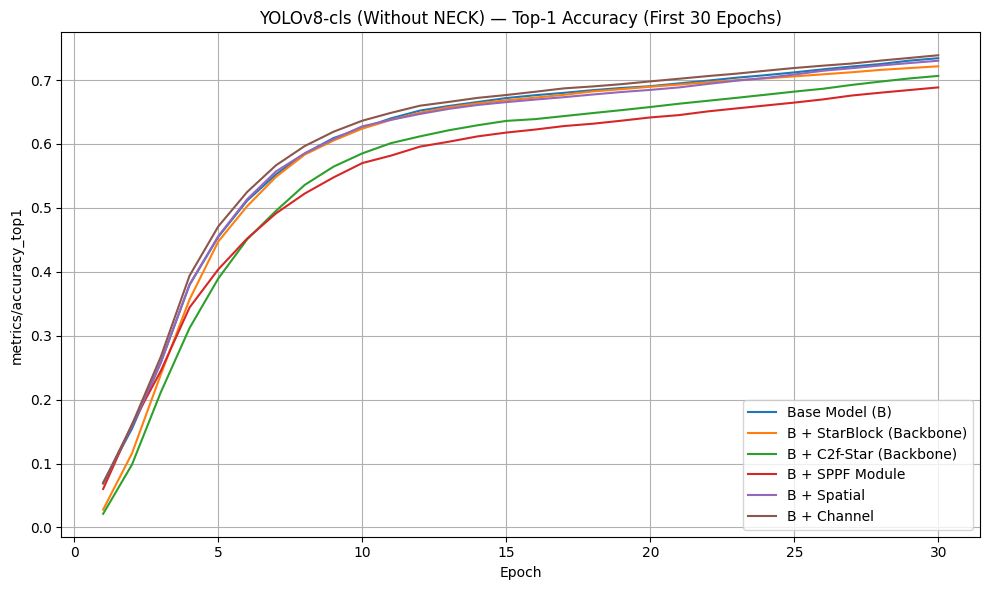

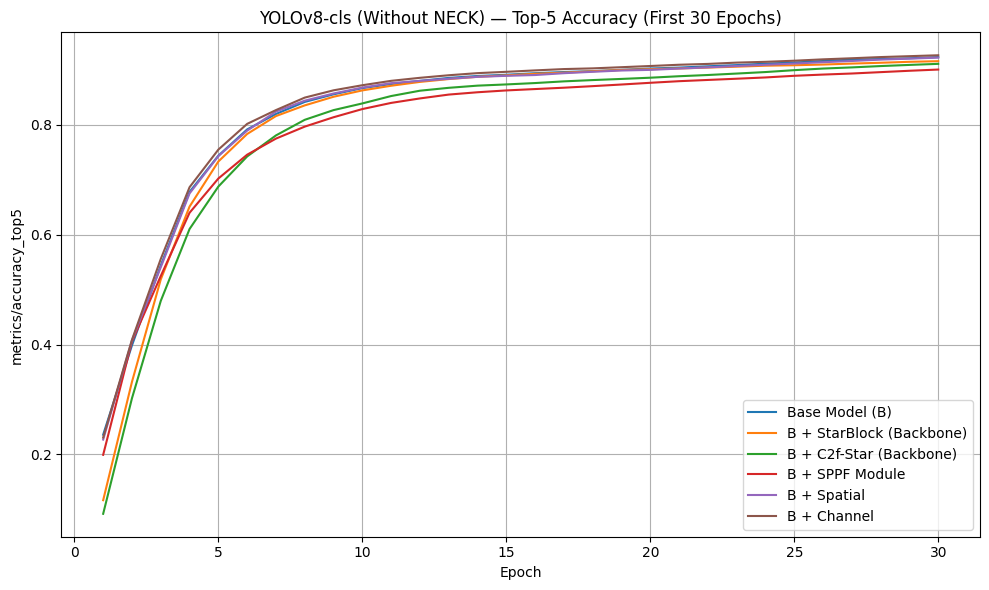

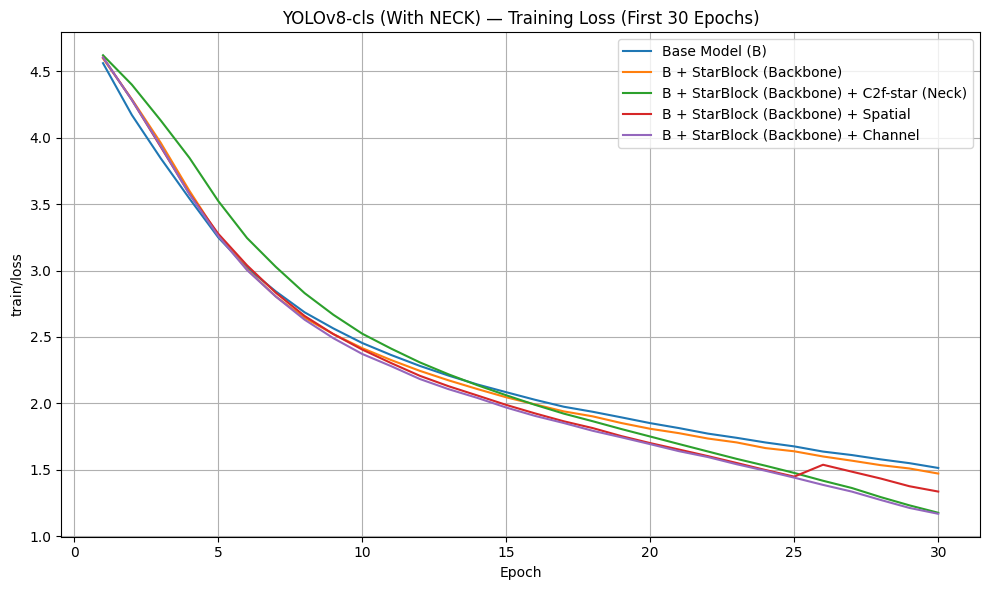

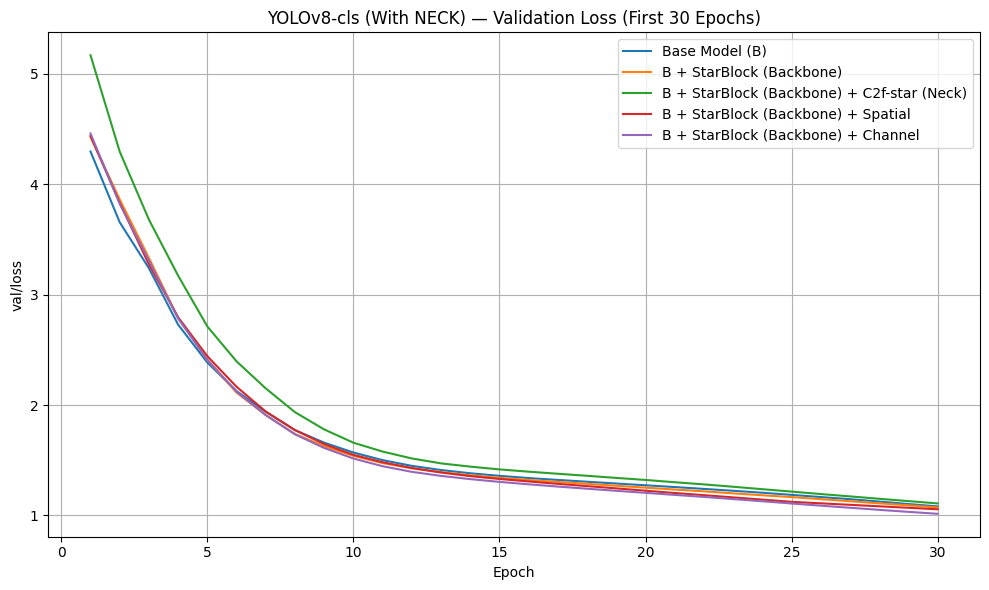

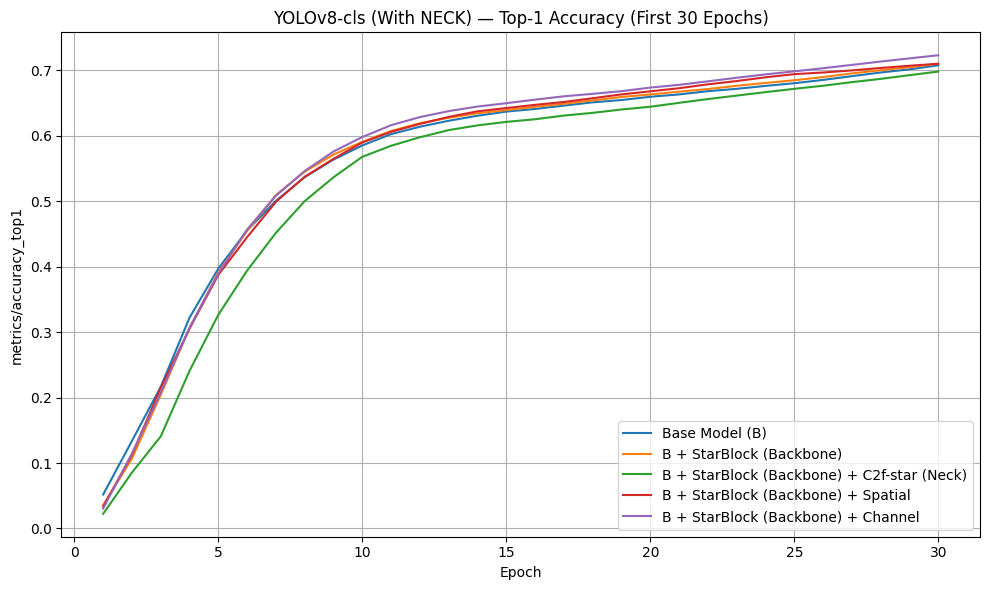

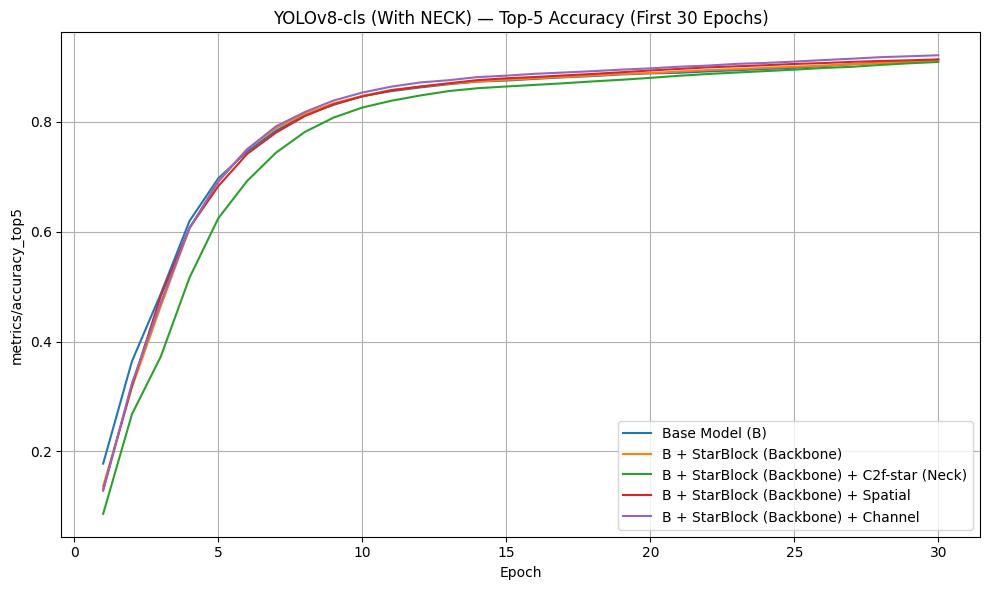

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# 1) Load CSVs (you already have paths + dataframes)
# ===============================

# ---- NO NECK models ----
models_no_neck = {
    "Base Model (B)": df_B_C1,
    "B + StarBlock (Backbone)": df_SB_C1,
    "B + C2f-Star (Backbone)": df_C2fSB_C1,
    "B + SPPF Module": df_SPPF_C1,
    "B + Spatial": df_SA_C1,
    "B + Channel": df_CA_C1,
}

# ---- WITH NECK models ----
models_neck = {
    "Base Model (B)": df_B_C2,
    "B + StarBlock (Backbone)": df_SB_C2,
    "B + StarBlock (Backbone) + C2f-star (Neck)": df_S_C2fSB_C2,
    "B + StarBlock (Backbone) + Spatial": df_S_SA_C2,
    "B + StarBlock (Backbone) + Channel": df_S_CA_C2,
}

# ===============================
# 2) Plot helper
# ===============================
def plot_metric(models_dict, metric_col, title, first_n_epochs=30):
    plt.figure(figsize=(10, 6))
    plotted_any = False

    for name, df in models_dict.items():
        if metric_col not in df.columns:
            continue

        epoch_col = "epoch" if "epoch" in df.columns else df.columns[0]
        x = df[epoch_col].iloc[:first_n_epochs]
        y = df[metric_col].iloc[:first_n_epochs]

        plt.plot(x, y, label=name)
        plotted_any = True

    if not plotted_any:
        print(f"⚠️ Skip '{title}' because column '{metric_col}' not found in any CSV.")
        return

    plt.xlabel("Epoch")
    plt.ylabel(metric_col)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ===============================
# 3) NO NECK: 4 plots
# ===============================
plot_metric(models_no_neck, "train/loss",
            "YOLOv8-cls (Without NECK) — Training Loss (First 30 Epochs)", 30)

plot_metric(models_no_neck, "val/loss",
            "YOLOv8-cls (Without NECK)— Validation Loss (First 30 Epochs)", 30)

plot_metric(models_no_neck, "metrics/accuracy_top1",
            "YOLOv8-cls (Without NECK) — Top-1 Accuracy (First 30 Epochs)", 30)

plot_metric(models_no_neck, "metrics/accuracy_top5",
            "YOLOv8-cls (Without NECK) — Top-5 Accuracy (First 30 Epochs)", 30)

# ===============================
# 4) WITH NECK: 4 plots
# ===============================
plot_metric(models_neck, "train/loss",
            "YOLOv8-cls (With NECK) — Training Loss (First 30 Epochs)", 30)

plot_metric(models_neck, "val/loss",
            "YOLOv8-cls (With NECK) — Validation Loss (First 30 Epochs)", 30)

plot_metric(models_neck, "metrics/accuracy_top1",
            "YOLOv8-cls (With NECK) — Top-1 Accuracy (First 30 Epochs)", 30)

plot_metric(models_neck, "metrics/accuracy_top5",
            "YOLOv8-cls (With NECK) — Top-5 Accuracy (First 30 Epochs)", 30)


# Extended training result

In [9]:
# ===== Path to Result model YOLOv8 (NECK)=====
P_S_Channel_C2_60 = Result_BaseModel_C2_path + r"/runs_N_star_CA_60/results_60.csv"
P_S_Channel_C2_100 = Result_BaseModel_C2_path + r"/runs_N_star_CA_100/results.csv"

# ===== Load YOLOv8 (NECK) results =====
df_S_CA_C2_60 = pd.read_csv(P_S_Channel_C2_60)
df_S_CA_C2_100 = pd.read_csv(P_S_Channel_C2_100)

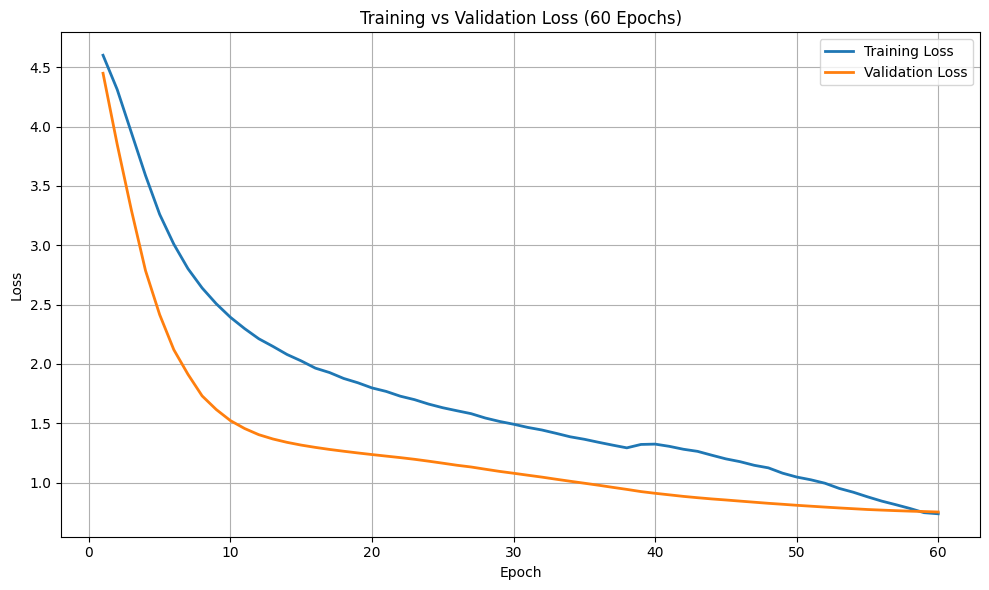

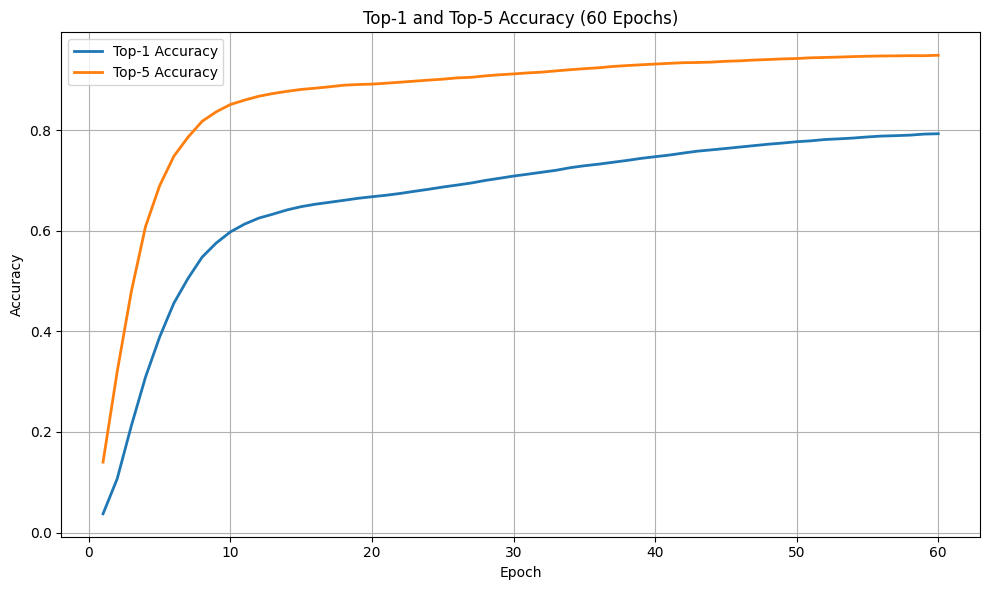

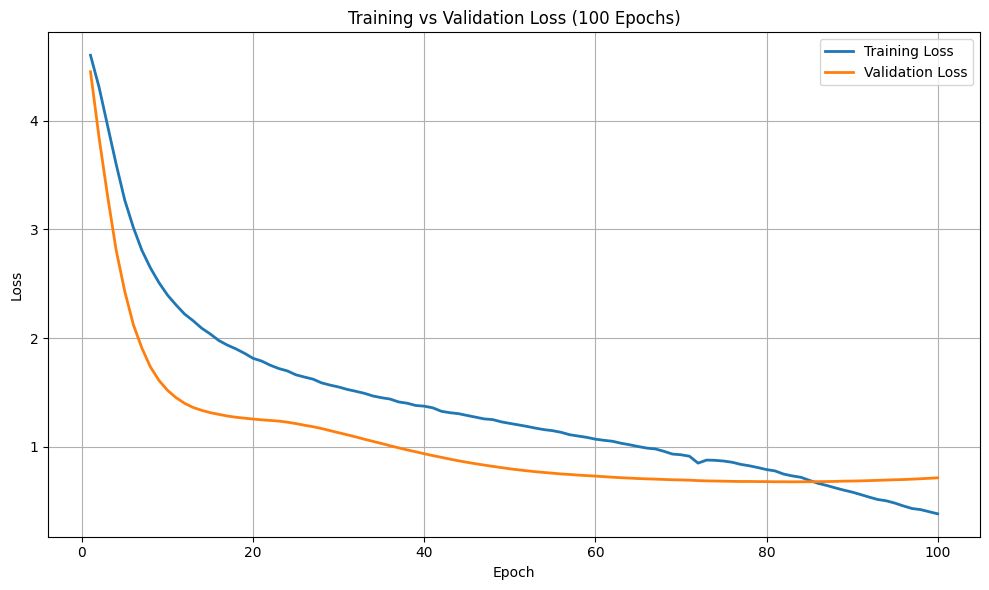

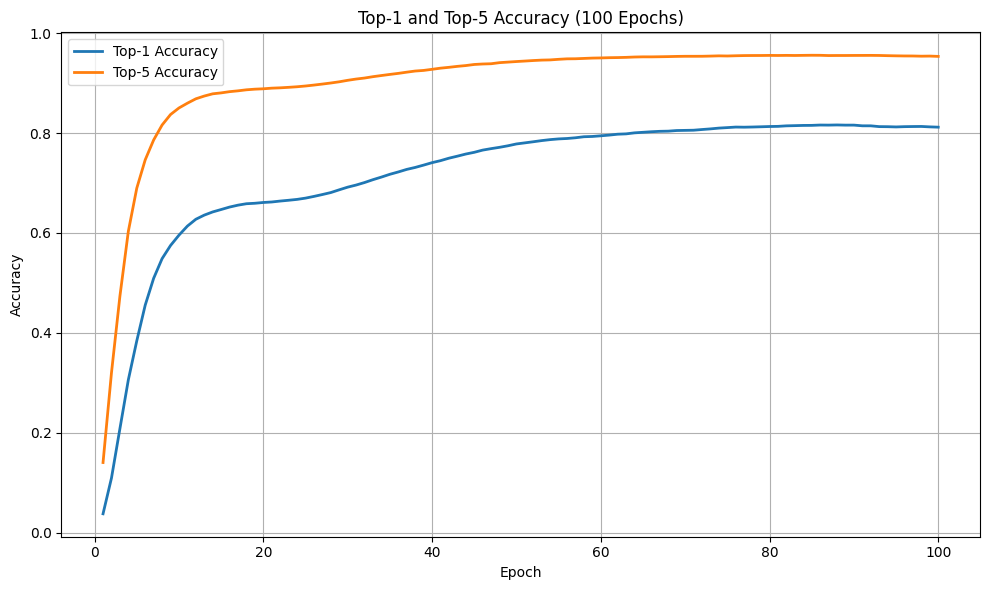

In [12]:
# =========================================================
# Figure 1: Training vs Validation Loss (60 epochs)
# =========================================================
plt.figure(figsize=(10, 6))
plt.plot(df_S_CA_C2_60["epoch"], df_S_CA_C2_60["train/loss"], label="Training Loss", linewidth=2)
plt.plot(df_S_CA_C2_60["epoch"], df_S_CA_C2_60["val/loss"], label="Validation Loss", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (60 Epochs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================================
# Figure 2: Top-1 & Top-5 Accuracy (60 epochs)
# =========================================================
plt.figure(figsize=(10, 6))
plt.plot(df_S_CA_C2_60["epoch"], df_S_CA_C2_60["metrics/accuracy_top1"], label="Top-1 Accuracy", linewidth=2)
plt.plot(df_S_CA_C2_60["epoch"], df_S_CA_C2_60["metrics/accuracy_top5"], label="Top-5 Accuracy", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Top-1 and Top-5 Accuracy (60 Epochs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================================
# Figure 3: Training vs Validation Loss (100 epochs)
# =========================================================
plt.figure(figsize=(10, 6))
plt.plot(df_S_CA_C2_100["epoch"], df_S_CA_C2_100["train/loss"], label="Training Loss", linewidth=2)
plt.plot(df_S_CA_C2_100["epoch"], df_S_CA_C2_100["val/loss"], label="Validation Loss", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss (100 Epochs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =========================================================
# Figure 4: Top-1 & Top-5 Accuracy (100 epochs)
# =========================================================
plt.figure(figsize=(10, 6))
plt.plot(df_S_CA_C2_100["epoch"], df_S_CA_C2_100["metrics/accuracy_top1"], label="Top-1 Accuracy", linewidth=2)
plt.plot(df_S_CA_C2_100["epoch"], df_S_CA_C2_100["metrics/accuracy_top5"], label="Top-5 Accuracy", linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Top-1 and Top-5 Accuracy (100 Epochs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()